In [1]:
!pip install IPython tensorflow
from IPython.display import display, Javascript
display(Javascript('IPython.notebook.execute_cells()'))
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import yfinance as yf


<IPython.core.display.Javascript object>

In [2]:
start = '2012-01-01'
end = '2022-12-21'
stock='GOOG'

data = yf.download(stock, start, end)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [3]:
data

Price,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG
Date,,,,,
2012-01-03,16.495003,16.562926,16.171750,16.185882,147611217
2012-01-04,16.566145,16.614980,16.376260,16.485581,114989399
2012-01-05,16.336349,16.459304,16.267435,16.413692,131808205
2012-01-06,16.113495,16.360891,16.107792,16.339819,108119746
2012-01-09,15.430305,16.038633,15.399813,16.026237,233776981
...,...,...,...,...,...
2022-12-14,94.860695,96.761695,93.497158,95.089614,26452900
2022-12-15,90.770065,93.586726,90.003699,93.099038,28298800


In [4]:
data.reset_index(inplace=True)
data

Price,Date,Close,High,Low,Open,Volume
Ticker,,GOOG,GOOG,GOOG,GOOG,GOOG
0,2012-01-03,16.495003,16.562926,16.171750,16.185882,147611217
1,2012-01-04,16.566145,16.614980,16.376260,16.485581,114989399
2,2012-01-05,16.336349,16.459304,16.267435,16.413692,131808205
3,2012-01-06,16.113495,16.360891,16.107792,16.339819,108119746
4,2012-01-09,15.430305,16.038633,15.399813,16.026237,233776981
...,...,...,...,...,...,...
2756,2022-12-14,94.860695,96.761695,93.497158,95.089614,26452900
2757,2022-12-15,90.770065,93.586726,90.003699,93.099038,28298800
2758,2022-12-16,90.431679,91.317483,89.585687,90.770072,48485500


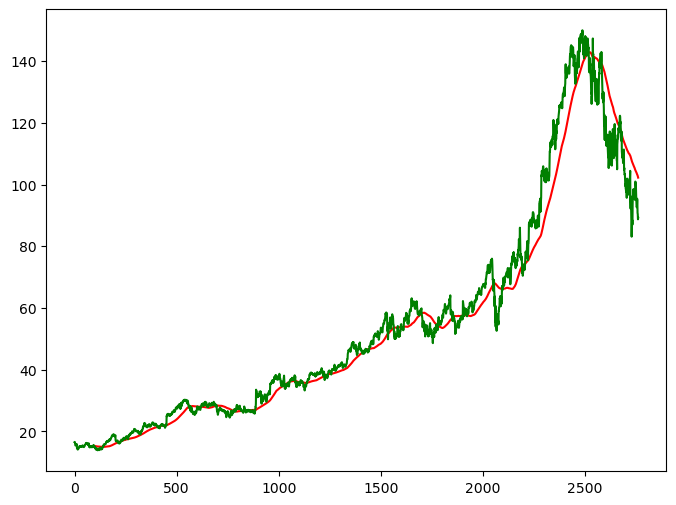

In [5]:
ma_100_days= data.Close.rolling(100).mean()
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close,'g')
plt.show()

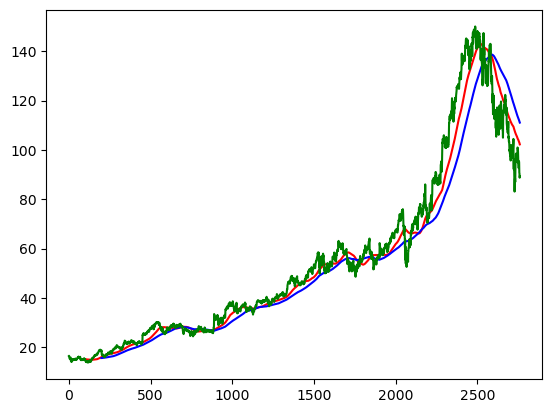

In [6]:
ma_200_days=data.Close.rolling(200).mean()
plt.plot(ma_100_days,'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close,'g')
plt.show()

In [7]:
data.dropna(inplace=True)

In [8]:
data_train=pd.DataFrame(data.Close[0:int(len(data)*0.80)])
data_test=pd.DataFrame(data.Close[int(len(data)*0.80):len(data)])

In [9]:
data_train.shape[0]

2208

In [10]:
data_test.shape[0]

553

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))


In [12]:
data_train_scale = scaler.fit_transform(data_train)

In [13]:
x=[]
y=[]
for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])
    

In [14]:
x, y = np.array(x), np.array(y)

In [15]:
!pip install keras tensorflow
from keras.layers import Dense,Dropout, LSTM
from keras.models import Sequential

In [16]:
model = Sequential()
model.add(LSTM(units = 50, activation ='relu',return_sequences = True,
               input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units =60, activation= 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units= 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))


C:\Users\Edith.Goren\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [17]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
# import os
# from keras.models import load_model

# # אם הקובץ של המודל קיים, נטען אותו
# if os.path.exists("my_model.keras"):
#     model = load_model("my_model.keras")

In [18]:

model.fit(x,y, epochs = 50, batch_size= 32, verbose=1)

Epoch 1/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 10s 99ms/step - loss: 0.0789
Epoch 2/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 6s 86ms/step - loss: 0.0086
Epoch 3/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 6s 97ms/step - loss: 0.0069
Epoch 4/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 7s 100ms/step - loss: 0.0062
Epoch 5/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 6s 88ms/step - loss: 0.0048
Epoch 6/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 8s 129ms/step - loss: 0.0056
Epoch 7/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 10s 155ms/step - loss: 0.0047
Epoch 8/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 16s 239ms/step - loss: 0.0048
Epoch 9/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 15s 227ms/step - loss: 0.0047
Epoch 10/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 17s 258ms/step - loss: 0.0043
Epoch 11/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 13s 203ms/step - loss: 0.0034
Epoch 12/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 14s 205ms/step - loss: 0.0040
Epoch 13/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 16s 238ms/step - loss: 0.0037
Epoch 14/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 16s 244ms/step - loss: 0.0038
Epoch 15/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 15s 233ms/ste

In [19]:
model.summary()
# model.save("my_model.keras")

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [20]:
pas_100_days = data_train.tail(100)      

In [21]:
data_test = pd.concat([pas_100_days, data_test],ignore_index=True)

In [24]:
data_test_scale = scaler.fit_transform(data_test)

In [40]:
x=[]
y=[]
for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x, y = np.array(x), np.array(y)    

In [41]:
y_predict = model.predict(x)

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step


In [42]:
scale= 1/scaler.scale_

In [43]:
y_predict= y_predict*scale


In [44]:
y=y*scale

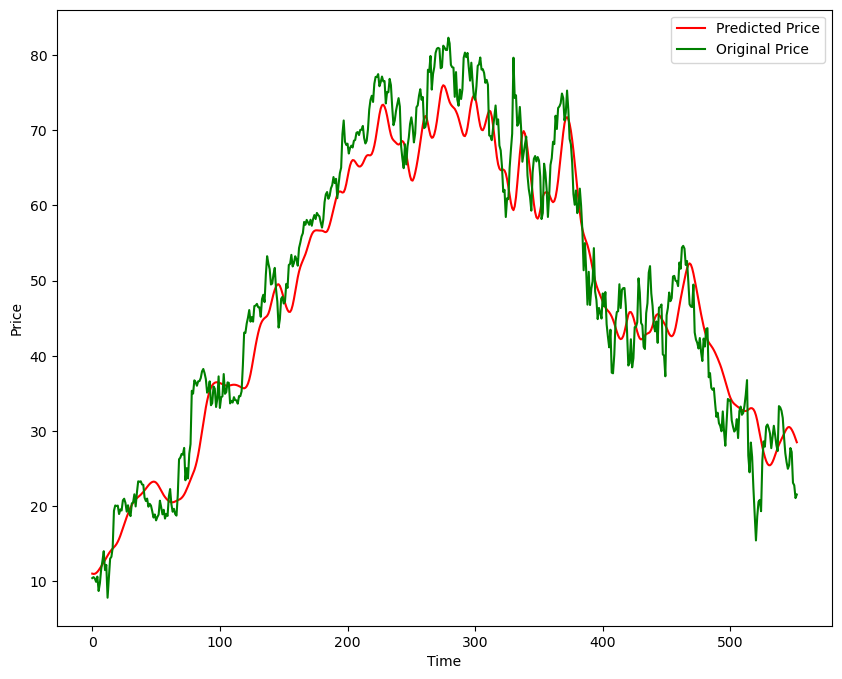

In [45]:
plt.figure(figsize=(10,8))
plt.plot(y_predict,'r',label= 'Predicted Price')
plt.plot(y,'g',label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [47]:
model.save('Stock Predictions Model.keras')